## Getting and setting up the Data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
# load dataset
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

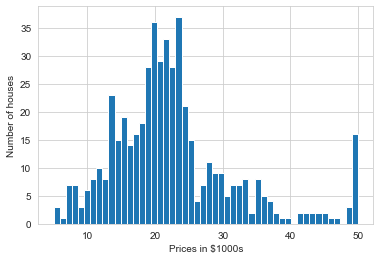

In [7]:
# Quick visualization of the data (histogram of prices)

plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of Rooms')

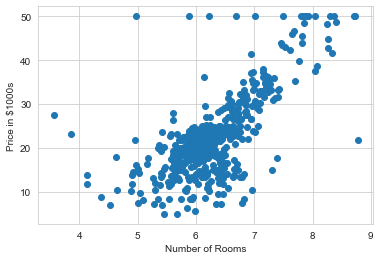

In [8]:
# Scatter plot one feature vs. a target (Housing price vs # rooms in dwelling)
# RM(rooms is #5 index), (.target method only useful in SkiLEarn dataset)

plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of Rooms')

In [9]:
# Use pandas to transform dataset into DataFrame
# Use seaborn to preform an lm plot on dataframe with a linear fit line
#.data and .feature_name are specific methods for SciKit Learn


boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_df['Price'] = boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


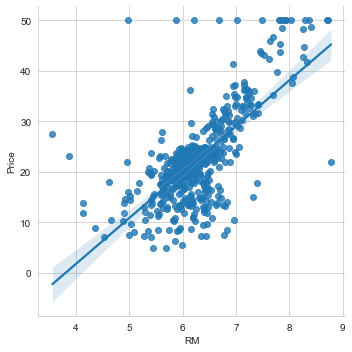

In [12]:
sns.lmplot(x='RM', y='Price', data=boston_df)

## Using Numpy for a Univariate Linear Regression

In [39]:
# set up X (values, attributes) and Y 

X = boston_df.RM

X = np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T

Y = boston_df.Price

In [40]:
# Get m and b values for best fit line
m, b = np.linalg.lstsq(X,Y,rcond=None)[0]

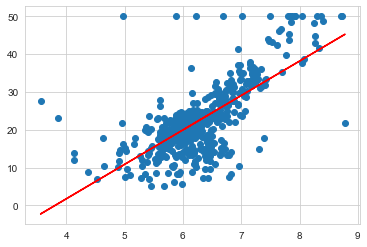

In [42]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM

plt.plot(x, m*x + b, 'r', label= 'Best Fit Line')

## Getting the Error: Root Mean Squared Error

In [43]:
result = np.linalg.lstsq(X,Y, rcond=None)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print('The root mean square error was %.2f' %rmse)

The root mean square error was 6.60


## Use SciKit Learn to Implement a Multivariate Regression

In [44]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [46]:
#Create a LinearRegression object
lreg = LinearRegression()

In [54]:
X_multi = boston_df.drop('Price', 1)

Y_target = boston_df.Price

C:\Users\ellio\AppData\Local\Temp/ipykernel_10756/2227739178.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_multi = boston_df.drop('Price', 1)


In [48]:
lreg.fit(X_multi, Y_target)

LinearRegression()

In [50]:
print('The estimated intercept coefficient is %.2f' %lreg.intercept_)

print('The number of coefficients used was %d' %len(lreg.coef_))

The estimated intercept coefficient is 36.46
The number of coefficients used was 13


In [55]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


## Using Training and Validation

In [57]:
# Split up data into a trianing set and a testing set

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

In [59]:
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [60]:
# Create a regression object

lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression()

In [65]:
# Run a prediction on X training and testing set

pred_train = lreg.predict(X_train)

pred_test = lreg.predict(X_test)

In [66]:
print( "Fit a model X_train, and calculate the MSE with Y_train: %.2f " % np.mean((Y_train - pred_train)**2))
      
print( "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f " % np.mean((Y_test - pred_test)**2))      

Fit a model X_train, and calculate the MSE with Y_train: 40.47 
Fit a model X_train, and calculate MSE with X_test and Y_test: 53.24 


## Residual Plots

Text(0.5, 1.0, 'Residual Plot')

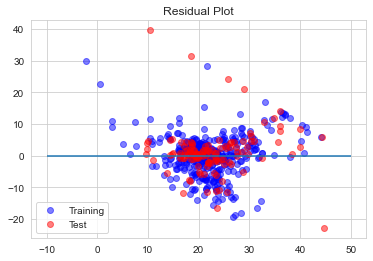

In [69]:
train = plt.scatter(x=pred_train,y= (Y_train - pred_train), c= 'b', alpha = 0.5)

test = plt.scatter(x=pred_test,y= (Y_test - pred_test), c='r', alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax=50)

plt.legend((train, test), ('Training', 'Test'), loc='lower left')

plt.title('Residual Plot')